<a href="https://colab.research.google.com/github/tashwitab/SCT_ML_01/blob/main/SCT_ML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
train_data = pd.read_csv('/content/drive/MyDrive/AIML data sets /SCT/train.csv')

In [10]:
train_data.head(), train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
 1   2          20       RL         80.0     9600   Pave   NaN      Reg   
 2   3          60       RL         68.0    11250   Pave   NaN      IR1   
 3   4          70       RL         60.0     9550   Pave   NaN      IR1   
 4   5          60       RL         84.0    14260   Pave   NaN      IR1   
 
   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
 2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
 3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   
 
   YrSold  SaleType  SaleCondition  SalePrice  
 0   2

In [11]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

In [12]:
X = train_data[features]
y = train_data[target]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [17]:
mse, r2, model.coef_, model.intercept_

(2806426667.247853,
 0.6341189942328371,
 array([   104.02630701, -26655.16535734,  30014.32410896]),
 52261.74862694461)

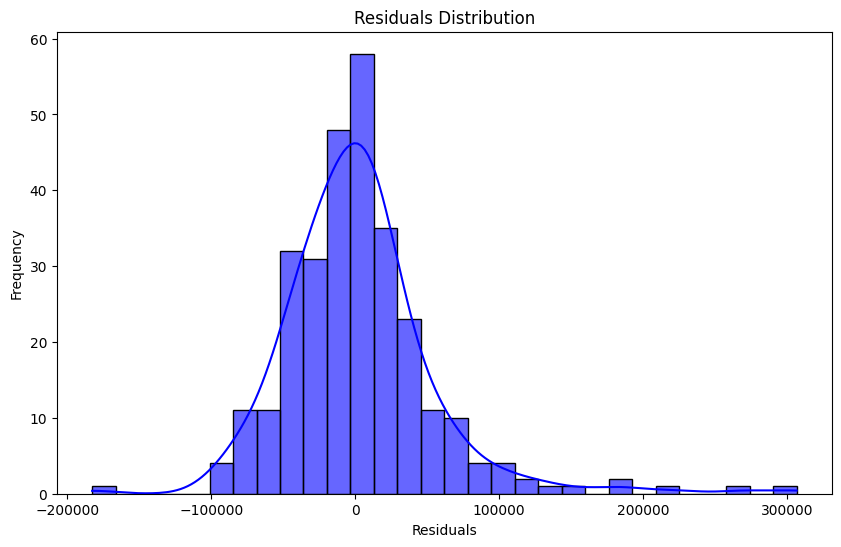

In [25]:
# Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue', alpha=0.6)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


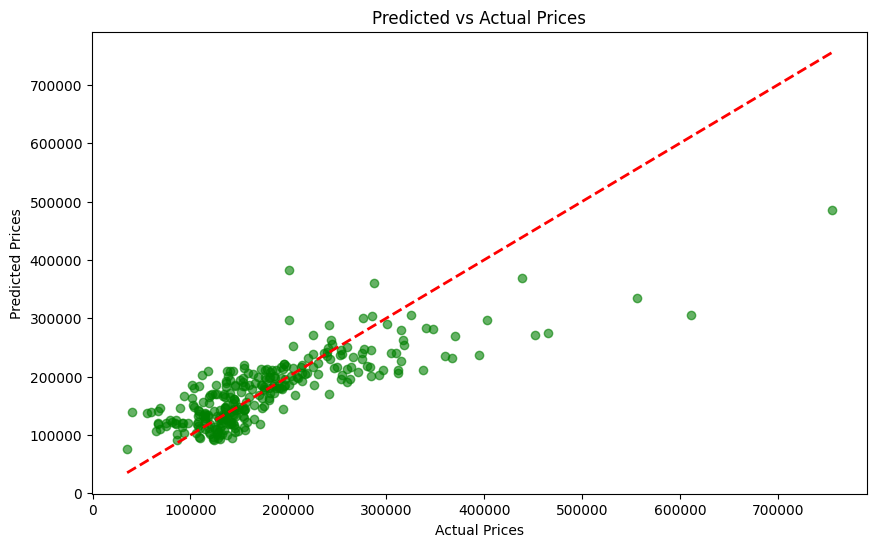

In [26]:
# Prediction vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title("Predicted vs Actual Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

<ipython-input-27-707b672f17e9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features, y=coefficients, palette='viridis')


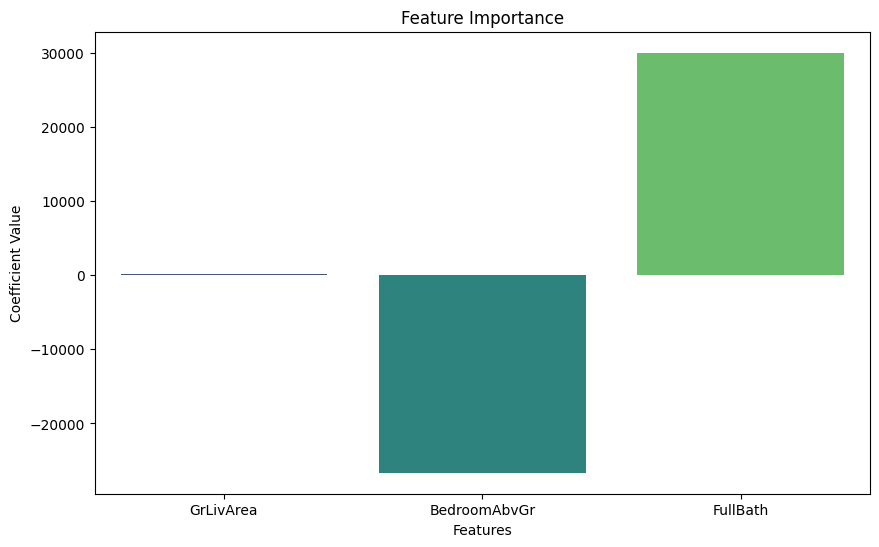

In [27]:
# Feature Importance
coefficients = model.coef_
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=coefficients, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()


In [24]:
# Function for user interaction and price prediction
def predict_house_price(model):
    try:
        print("Enter the details of the house:")
        square_footage = float(input("Square footage (GrLivArea): "))
        bedrooms = int(input("Number of bedrooms (BedroomAbvGr): "))
        bathrooms = int(input("Number of full bathrooms (FullBath): "))

        # Create a DataFrame for the user input
        user_data = pd.DataFrame({
            'GrLivArea': [square_footage],
            'BedroomAbvGr': [bedrooms],
            'FullBath': [bathrooms]
        })

        # Predict the price
        predicted_price = model.predict(user_data)[0]
        print(f"\nThe predicted price of the house is: ${predicted_price:,.2f}")
    except Exception as e:
        print(f"Error: {e}")

In [28]:
# Model Evaluation Summary
print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

Model Evaluation:
Mean Squared Error (MSE): 2806426667.25
R-squared (R^2): 0.63


In [30]:
# Enable user interaction for prediction
predict_house_price(model)

Enter the details of the house:
Square footage (GrLivArea): 1710
Number of bedrooms (BedroomAbvGr): 3
Number of full bathrooms (FullBath): 2

The predicted price of the house is: $210,209.89
